In [16]:
import pandas as pd
import lxml.html
import requests

In [54]:
res = requests.get('https://blog.naver.com/shabanglee')

In [55]:
root = lxml.html.fromstring(res.text)

In [59]:
content = root.cssselect('div#content')[0].text_content()

IndexError: list index out of range

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [41]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [42]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[ 1,  1,  1,  1, 10,  1,  8,  1,  1,  1,  1,  2,  1,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  2,  1,
         2,  1,  4,  7,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  2,  2,
         1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  2,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  3,  1,  2,
         1,  1,  1,  1,  1,  2,  1,  5,  1,  6,  1,  1,  2,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  2,  4,  1,  1,  1,  2,  2,  1,  1,  1,
         1,  2,  1,  1,  1,  1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  3,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  5,
         1,  2,  2,  1,  1,  1,  6,  1,  1,  3,  1,  1,  1]], dtype=int64)

In [43]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [44]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
4,0시,10
6,10,8
35,27일,7
105,기준,6
56,4월,6
24,19,6
182,현황,6
103,국내,5
175,코로나바이러스감염증,5
34,27,4


In [45]:

from wordcloud import WordCloud

In [46]:
#wc = WordCloud(width=400, height=400, background_color='white')
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMPYUN.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [47]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

In [48]:

wc.fit_words(frequencies)

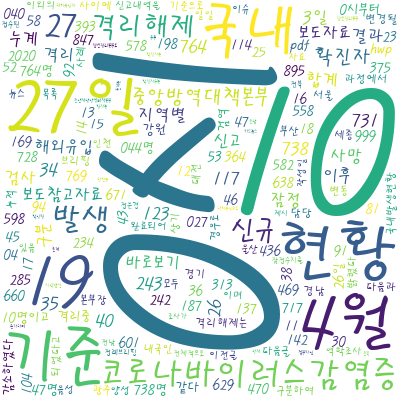

In [49]:
wc.to_image()